In [2]:
def fillna_and_replace(X_train):
    processed_col = []
    replace_dict_1 = {np.NAN:0,'Fa':1,'TA':2,'Gd':3,'Ex':4}
    replace_dict_2 = {np.NAN:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

    X_train.PoolQC.replace(replace_dict_1,inplace = True)
    processed_col.append('PoolQC')
    
    X_train.MiscFeature.fillna('None',inplace = True)
    processed_col.append('MiscFeature')
    
    X_train.Alley.fillna('None',inplace = True)
    processed_col.append('Alley')
    
    X_train.Fence.fillna('None',inplace = True)
    processed_col.append('Fence')
    
    X_train.FireplaceQu.replace(replace_dict_2,inplace=True)
    processed_col.append('FireplaceQu')
    
    X_train.LotFrontage.fillna(X_train.LotFrontage.mode().values[0],inplace = True)
    processed_col.append('LotFrontage')
    
    # ?品质级别和实际的价格不符合，探索一下
    X_train.GarageCond.replace(replace_dict_2,inplace = True)
    processed_col.append('GarageCond')
    
    # ！竟然是四条直线，yearsold，仔细探索一下。另外做一个卖出时间、存留时间、价格的图。
    X_train.GarageFinish.replace({np.NAN:0,'Unf':1,'RFn':2,'Fin':3},inplace = True)
    processed_col.append('GarageFinish')
    
    X_train.GarageType.fillna('None',inplace=True)
    processed_col.append('GarageType')
    
    X_train.GarageQual.replace(replace_dict_2,inplace = True)
    processed_col.append('GarageQual')
    
    X_train.loc[X_train.GarageYrBlt.isna(),'GarageYrBlt'] = X_train.loc[X_train.GarageYrBlt.isna(),'YearBuilt']
    processed_col.append('GarageYrBlt')
    
    # ?品质级别和实际的价格不符合，探索一下
    X_train.BsmtFinType2.replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0},inplace=True)
    processed_col.append('BsmtFinType2')
    
    # ?品质级别和实际的价格不符合，探索一下
    X_train.BsmtFinType1.replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0},inplace=True)
    processed_col.append('BsmtFinType1')
    
    # 强特征
    X_train.BsmtExposure.replace({np.nan:0,'No':1,'Mn':2,'Av':3,'Gd':4},inplace = True)
    processed_col.append('BsmtExposure')
    
    # 强特征
    X_train.BsmtQual.replace(replace_dict_2,inplace = True)
    processed_col.append('BsmtQual')
    
    # ?品质级别和实际的价格不符合，None卖的可能更高
    X_train.BsmtCond.replace(replace_dict_2,inplace=True)
    processed_col.append('BsmtCond')
    
    
    X_train.MasVnrType.fillna('None2',inplace=True)
    processed_col.append('MasVnrType')
    
    X_train.MasVnrArea.fillna(X_train.loc[X_train.MasVnrType=='BrkFace','MasVnrArea'].mean(),inplace=True)
    processed_col.append('MasVnrArea')
    
    X_train.Electrical.fillna(X_train.Electrical.mode()[0],inplace=True)
    X_train.Electrical.replace({np.nan:0,'Mix':1,'FuseP':2,'FuseF':3,'FuseA':4,'SBrkr':5},inplace=True)
    processed_col.append('SBrkr')
    
    ## 1.2对剩下的分类变量顺序化
    
    cat_cols = [col  for col in X_train.columns if X_train[col].dtype == 'object']
    num_cols = [col  for col in X_train.columns if X_train[col].dtype != 'object']
    unprocessed_col = [col for col in cat_cols if col not in processed_col]
    
    #训练集没有nan,测试集有nan,怎么办
    #这个不换
    X_train.MSZoning.unique()
    processed_col.append('MSZoning')
    
    X_train.Street.replace({'Grvl':1,'Pave':2})
    processed_col.append('Street')
    
    #这个不换
    processed_col.append('LotShape')
    
    X_train.LandContour.replace({'Bnk':1,'Lvl':2,'Low':3,'HLS':4},inplace=True)
    processed_col.append('LandContour')
    
    X_train.Utilities.replace({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4},inplace=True)
    processed_col.append('Utilities')
    
    # 这个不换
    X_train.LotConfig.unique()
    processed_col.append('LotConfig')
    
    # 这个不换
    X_train.LandSlope.unique()
    processed_col.append('LandSlope')
    
    # 这个不换
    X_train.Neighborhood.unique()
    processed_col.append('Neighborhood')
    
    # 这两个不换
    X_train.Condition1.unique()
    processed_col.append('Condition1')
    X_train.Condition2.unique()
    processed_col.append('Condition2')
    # 这个不换
    X_train.BldgType.unique()
    processed_col.append('BldgType')
    
    # 这个不换
    processed_col.append('HouseStyle')
    # 这个不换
    processed_col.append('RoofStyle')
    # 这个不换
    processed_col.append('RoofMatl')
    
    # 没换，但是特征算比较强
    processed_col.append('Exterior1st')
    # 没换
    processed_col.append('Exterior2nd')
    
    X_train.ExterQual.replace(replace_dict_2,inplace=True)
    processed_col.append('ExterQual')
    
    X_train.ExterCond.replace(replace_dict_2,inplace=True)
    processed_col.append('ExterCond')
    
    # 有一定特征，没换
    processed_col.append('Foundation')
    # 没换
    processed_col.append('Heating')
    
    X_train.HeatingQC.replace(replace_dict_2,inplace=True)
    processed_col.append('HeatingQC')
    
    X_train.CentralAir.replace({'N':1,'Y':2},inplace=True)
    processed_col.append('CentralAir')
    
    X_train.KitchenQual.replace(replace_dict_2,inplace=True)
    processed_col.append('KitchenQual')
    
    #没换
    X_train.PavedDrive.replace({'N':1,'P':2,'Y':3},inplace=True)
    processed_col.append('PavedDrive')
    processed_col.append('Functional')
    
    # 有一定特征，没换
    processed_col.append('SaleType')
    
    # 特征不是很明显，没换
    processed_col.append('SaleCondition')
    return X_train
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#显示所有列
pd.set_option('display.max_columns', None)
##显示所有行
#pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [6]:
TRAIN = pd.read_csv('./data/train.csv')
TEST = pd.read_csv('./data/test.csv')


X = TRAIN.drop('SalePrice',axis = 1)
Y = TRAIN.SalePrice
---
X.drop('Id',axis = 1,inplace=True)
X.loc[:,'Yrdiff'] = X.YrSold -  X.YearRemodAdd
X = fillna_and_replace(X)



In [4]:
def preprocess(X,OH = None,Imp = None):
    
    X = first(X)
    X_imp = fillnans(X,Imp)        
    X_pred = onehot(X,X_imp,OH)   
    # 标准化
    #model_ss = StandardScaler()
    #X_pred = model_ss.fit_transform(X_pred)
    
    return X_pred,OH,Imp
    
def first(X):
    X.drop('Id',axis = 1,inplace=True)
    X.loc[:,'Yrdiff'] = X.YrSold -  X.YearRemodAdd
    X = fillna_and_replace(X)
    return X

    
def fillnans(X, Imp = None):
    
    if not Imp:
        imp  = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
        X_imp = imp.fit_transform(X)
        X_imp = pd.DataFrame(data=X_imp,columns=X.columns,index=X.index)
    else:
        X_imp = Imp.transform(X)
        X_imp = pd.DataFrame(data=X_imp,columns=X.columns,index=X.index)
                             
    return X_imp


def onehot(X,X_imp,OH=None):

    cat_cols = [col  for col in X.columns if X[col].dtype == 'object']
    num_cols = [col  for col in X.columns if X[col].dtype != 'object']     
    X_imp_num,X_imp_cat = X_imp[num_cols],X_imp[cat_cols]
    
    if not OH:
        OH = OneHotEncoder()
        X_imp_cat = OH.fit_transform(X_imp_cat).toarray()
    else:
        OH = OH
        X_imp_cat = OH.transform(X_imp_cat).toarray()
        #print(X_imp_cat)
    
    X_pred = pd.concat([X_imp_num,pd.DataFrame(X_imp_cat,index = X_imp.index)],axis=1)  
    return X_pred
    

In [10]:
TRAIN = pd.read_csv('./data/train.csv')
TEST = pd.read_csv('./data/test.csv')
TRAIN.index = TRAIN.Id
TEST.index = TEST.Id
X_all = pd.concat([TRAIN,TEST],axis=0)
X_all.drop('SalePrice',axis=1,inplace=True)

In [11]:

X_all,p1,p2 = preprocess(X_all)
Y_train = TRAIN.SalePrice
X_train = X_all.loc[1:1460,:]
X_test = X_all.loc[1461:,:]

In [12]:
model_gbr = GradientBoostingRegressor(random_state=0,n_estimators=304,learning_rate=0.08,max_depth=5)
y_pred = model_gbr.fit(X_train,Y_train).predict(X_test)

In [13]:
# Save test predictions to file
output = pd.DataFrame({'Id': TEST.index,
                       'SalePrice': y_pred})
output.to_csv('submission.csv', index=False)


In [53]:
output

,Id,SalePrice
0,1461,123463.073264
1,1462,158454.533119
2,1463,198117.277251
3,1464,191780.119502
4,1465,193625.185561
5,1466,174230.415186
6,1467,166205.995974
7,1468,169611.869139
8,1469,185347.533778
9,1470,124689.891801


In [150]:
cat_cols = [col  for col in X.columns if X[col].dtype == 'object']
num_cols = [col  for col in X.columns if X[col].dtype != 'object'] 
# 填充缺失值
imp  = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
X_imp = imp.fit_transform(X)

# 独热编码
X_imp = pd.DataFrame(data=X_imp,columns=X.columns)
X_imp_num,X_imp_cat = X_imp[num_cols],X_imp[cat_cols]
OH = OneHotEncoder()
X_imp_cat = OH.fit_transform(X_imp_cat).toarray()
X_pred = pd.concat((X_imp_num,pd.DataFrame(X_imp_cat)),axis=1)

# 标准化
model_ss = StandardScaler()
X_pred = model_ss.fit_transform(X_pred)

# 分组
X_train, X_test, y_train, y_test = train_test_split(X_pred, Y, test_size=0.33, random_state=42)


ValueError: Number of features of the model must match the input. Model n_features is 234 and input n_features is 220 

In [128]:
len(TEST)

1459

ValueError: arrays must all be same length

In [112]:
[TEST.index,y_pred]

[RangeIndex(start=0, stop=1459, step=1),
 array([202619.80575486, 164261.59152264, 207500.55240521, ...,
        265614.7645866 , 141343.35817669, 155697.23970391])]

In [109]:
y_pred.shape

(1460,)

## 1.4实验模型

In [9]:
# 导入库
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, ElasticNet# 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
#from xgboost import XGBRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
mean_squared_error, r2_score  # 批量导入指标算法
import matplotlib.pyplot as plt  # 导入图形展示库

D:\cx\anaconda\installthere\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
# 初选回归模型
n_folds = 5  # 设置交叉检验的次数
model_names = ['BayesianRidge', 'XGBR', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_xgbr = XGBRegressor(random_state=0)  # 建立XGBR对象
model_etc = ElasticNet(random_state=0)  # 建立弹性网络回归模型对象
model_svr = SVR(gamma='scale')  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor(random_state=0)  # 建立梯度增强回归模型对象
model_list = [model_br, model_xgbr, model_etc,model_svr, model_gbr]  # 不同回归模型对象的集合
pre_y_list = [model.fit(X_train, y_train).predict(X_test) for model in model_list]  # 各个回归模型预测的y值列表

In [13]:
# 模型效果评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_functions = [explained_variance_score, mean_absolute_error, mean_squared_error,r2_score]  # 回归评估指标对象集
model_metrics_list = [[m(y_test, pre_y_list[i]) for m in model_metrics_functions] for i in range(len(model_list))]  # 回归评估指标列表
regresstion_score = pd.DataFrame(model_metrics_list, index=model_names,
                   columns=['explained_variance', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print('all samples: %d \t features: %d' % (n_samples, n_features),'\n','-'*60)  # 打印输出样本量和特征数量
print('\n','regression metrics:','\n','-'*60)  # 打印输出标题
print(regresstion_score)  # 打印输出回归指标的数据框

all samples: 1460 	 features: 80 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
               explained_variance           mae           mse        r2
BayesianRidge            0.872775  18679.687106  9.352868e+08  0.872601
XGBR                     0.837877  18643.166510  1.191358e+09  0.837720
ElasticNet               0.848695  18555.142747  1.112723e+09  0.848432
SVR                      0.000398  57363.122728  7.584886e+09 -0.033167
GBR                      0.867125  17210.619067  9.755472e+08  0.867117


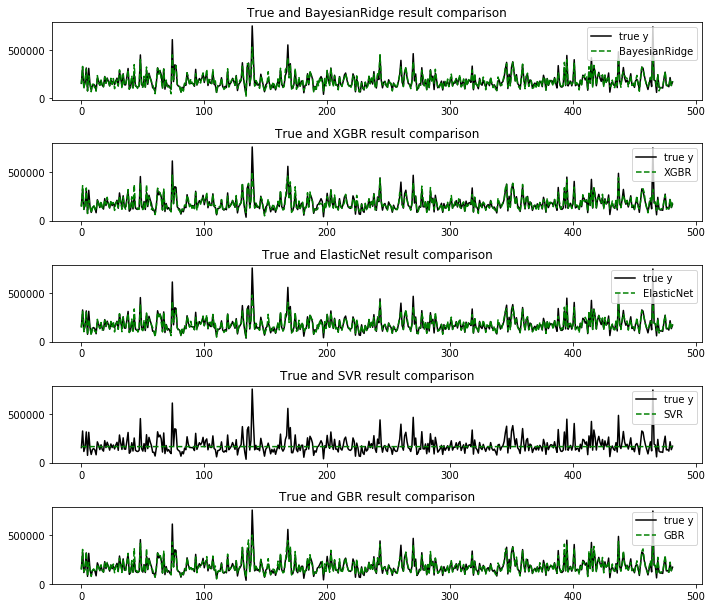

In [14]:
# 模型效果可视化
plt.figure(figsize=(10, 10))  # 创建画布
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.subplot(len(pre_y_list)+1,1,i+1)
    plt.plot(np.arange(len(y_test)), y_test, color='k', label='true y')  # 画出原始值的曲线
    plt.plot(np.arange(len(y_test)), pre_y_list[i], 'g--', label=model_names[i])  # 画出每条预测结果线
    plt.title('True and {} result comparison'.format(model_names[i]))  # 标题
    plt.legend(loc='upper right')  # 图例位置
    plt.tight_layout() # 自动调整子图间隔

# 调参

In [43]:
#from sklearn.model_selection import StratifiedKFold #交叉验证
#from sklearn.model_selection import GridSearchCV# 网格搜索调参
#
#kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)#10折交叉验证
#param_grid = {'learning_rate':[0.08],'n_estimators':365,max}
#model_gbr = GradientBoostingRegressor()
#clf = GridSearchCV(model_gbr, param_grid=param_grid, scoring='neg_mean_absolute_error',cv = kflod)
#clf.fit(X_train,y_train)
# 365,0.08

In [71]:
# 根据测试结果，初步选用GBR
def model_test(n=250,rate = 0.01,max_dep = 3):
    #print(n)
    model_gbr = GradientBoostingRegressor(random_state=0,n_estimators=n,learning_rate=rate,max_depth=max_dep)
    y_pred = model_gbr.fit(X_train,y_train).predict(X_test)
    score = mean_absolute_error(y_test,y_pred)    
    return  score
# n_estmators=250,learning_rate=0.05

In [74]:
xz = np.arange(300,320,1)
yz = []
for rate in xz:
    print(rate)
    yz.append(model_test(n=rate,rate = 0.08,max_dep = 5))
    
plt.plot(xz,yz)

300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


In [85]:
model_test(n=304,rate=0.08,max_dep=5)

16459.524785063524

# 结果输出